In [1]:
import numpy as np
from scipy.linalg import solve

In [7]:

def split_factor_method(f, epsilon, r_init, s_init):
    """
    劈因子法求根
    :param f: np.poly多项式
    :param epsilon: 最大误差
    :return: 多项式的根
    """
    r = r_init  # 初始化w(x) = x**2 - x - 1
    s = s_init
    n = len(f)  # 多项式最高次幂
    b = np.array(f.c, dtype=float)  # b初始化为f的各项系数,也就是a
    a = f.c[::-1]  # 反转多项式系数的顺序
    roots = []
    while True:
        if n == 1:
            roots.append(f.roots[0])
            return np.array(roots)
        elif n == 2:
            x1, x2 = f.roots
            roots.extend([x1, x2])
            return np.array(roots)
        else:
            # 首先求b,计算出r_0,r_1
            b[n] = a[n]
            b[n - 1] = a[n - 1] + r * b[n]
            for i in range(n - 2, -1, -1):  # i in [n-2, 0]
                b[i] = a[i] + r * b[i + 1] + s * b[i + 2]

            # 然后计算c,算出r_0,r_1对v的偏导
            c = b.copy()
            c[n] = b[n]
            c[n - 1] = b[n - 1] + r * c[n]
            for i in range(n - 2, 0, -1):  # i in [n-2,1]
                c[i] = b[i] + r * c[i + 1] + s * c[i + 2]

            # 求解二元一次方程组,得到delta_r,delta_s
            delta_r, delta_s = solve([[c[2], c[3]], [c[1], c[2]]], [-b[1], -b[0]])
            r = r + delta_r
            s = s + delta_s


            if max(abs(delta_r / r), abs(delta_s / s)) < epsilon:  # 当前多项式求得一组根,对应 x**2 - rx - s
                f_root = np.poly1d([1, -r, -s])  # 根对应的二元一次
                x1, x2 = f_root.roots
                roots.extend([x1, x2])

                # 更新f和a,b
                f = (f / f_root)[0]  # f = f(x) / w(x) 的商,舍弃余数
                n = len(f)
                a = f.c[::-1]
                b = np.array(f.c, dtype=float)

In [82]:
f = np.poly1d([1, -3.5, 2.75, 2.125, -3.875, 1.25])
roots = split_factor_method(f, epsilon=0.01, r_init=-1, s_init=-1)
roots # 结果和ppt上例题的结果一样

array([-1.00000004+0.j        ,  0.49999997+0.j        ,
        1.00000826+0.49992859j,  1.00000826-0.49992859j,
        1.99998354+0.j        ])

In [78]:
# 可以逼近任何一个多项式的解
f = np.poly1d([1,2,3,4,5,6,7,8,9])
roots = split_factor_method(f, epsilon=0.01, r_init=-1, s_init=-1)
roots

array([-1.28876101+0.44768047j, -1.28876101-0.44768047j,
        0.13639428+1.30499944j,  0.13639428-1.30499944j,
        0.87675916+0.88136345j,  0.87675916-0.88136345j,
       -0.72439242+1.1369769j , -0.72439242-1.1369769j ])

In [79]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

Text(0.5,0,'real of f(x)')

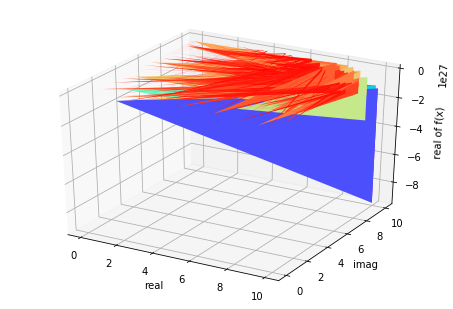

In [96]:
fig = plt.figure()
ax = Axes3D(fig)

X = np.random.random(1000) * 10
Y = np.random.random(1000) * 10
fx = f(X + 1j * Y)
Z = f([fx.real.tolist(),fx.imag.tolist()])
ax.plot_surface(X,Y,Z, rstride=1, cstride=1, cmap=plt.get_cmap('rainbow'))
ax.set_xlabel('real')
ax.set_ylabel('imag')
ax.set_zlabel('real of f(x)')
# what the hell is this?????